In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import graphviz 
import pylab
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [221]:
#Read csv data
data_train = pd.read_csv('../data_preparation/subset_train_expanded.csv', index_col=0)
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1276,M16135,M,298.1,309.4,1362,47.6,70,0,0,0,0,0,0
9931,L57110,L,298.3,308.3,1452,45.5,63,0,0,0,0,0,0
5403,L52582,L,302.7,312.3,1421,48.5,0,0,0,0,0,0,0
9437,L56616,L,298.0,308.6,1481,42.5,54,0,0,0,0,0,0
564,L47743,L,297.7,309.6,1529,35.2,153,0,0,0,0,0,0


In [222]:
#define function for classifying Type based on Load as 1,2,3
def type_new(row):
    if row['Type'] == 'L':
        val = '1'
    elif row['Type'] == 'M':
        val = '2'
    else:
        val = '3'
    return val

In [223]:
# Training dataset
#create new column 'Type_Num' using the function above for numerical load type
data_train['Type_Num'] = data_train.apply(type_new, axis=1)
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
1276,M16135,M,298.1,309.4,1362,47.6,70,0,0,0,0,0,0,2
9931,L57110,L,298.3,308.3,1452,45.5,63,0,0,0,0,0,0,1
5403,L52582,L,302.7,312.3,1421,48.5,0,0,0,0,0,0,0,1
9437,L56616,L,298.0,308.6,1481,42.5,54,0,0,0,0,0,0,1
564,L47743,L,297.7,309.6,1529,35.2,153,0,0,0,0,0,0,1


In [224]:
#Testing dataset
data_test = pd.read_csv('../data_preparation/subset_test_expanded.csv', index_col=0)
data_test['Type_Num'] = data_test.apply(type_new, axis=1)
data_test.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
7600,L54779,L,300.5,311.0,1759,28.3,13,0,0,0,0,0,0,1
3665,M18524,M,302.3,311.7,1685,30.8,130,0,0,0,0,0,0,2
6718,M21577,M,301.4,310.6,1464,48.6,96,0,0,0,0,0,0,2
1077,L48256,L,296.9,307.7,1653,35.9,177,0,0,0,0,0,0,1
3130,L50309,L,300.1,309.6,1642,34.5,53,0,0,0,0,0,0,1


In [225]:
#Validation dataset
data_valid = pd.read_csv('../data_preparation/subset_valid_expanded.csv', index_col=0)
data_valid['Type_Num'] = data_valid.apply(type_new, axis=1)
data_valid.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
1071,M15930,M,296.9,307.8,1477,37.2,160,0,0,0,0,0,0,2
1877,L49056,L,298.3,308.0,1242,62.0,98,0,0,0,0,0,0,1
2328,M17187,M,299.3,308.7,1420,50.3,208,0,0,0,0,0,0,2
6863,M21722,M,301.1,311.2,1384,49.4,48,0,0,0,0,0,0,2
945,M15804,M,295.7,306.3,1712,28.5,43,0,0,0,0,0,0,2


In [226]:
label = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', \
         'Torque [Nm]', 'Tool wear [min]', 'Type_Num']

## 1.  K Neighbor classifier

In [227]:
X_train = data_train[label]
y_train = data_train['Machine failure']

# Using optimal 5 Nearest neighbor for model to fit
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

print('Train score :',neigh.score(X_train, y_train))
print('Test score : ',neigh.score(data_test[label], data_test['Machine failure']))
print('Validation score : ',neigh.score(data_valid[label], data_valid['Machine failure']))

Train score : 0.9826916024935827
Test score :  0.7480798771121352
Validation score :  0.6882684426229508


In [228]:
# Classification report for testing datacase
print(classification_report(data_test['Machine failure'], neigh.predict(data_test[label]),\
                            target_names=['Normal operation', "Failure"]))

                  precision    recall  f1-score   support

Normal operation       0.68      0.94      0.79       967
         Failure       0.91      0.56      0.69       986

        accuracy                           0.75      1953
       macro avg       0.79      0.75      0.74      1953
    weighted avg       0.79      0.75      0.74      1953



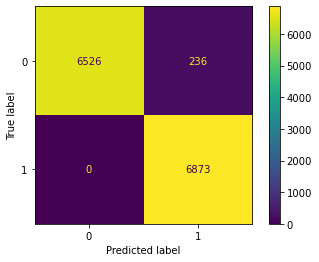

In [229]:
cm_val = confusion_matrix(data_train['Machine failure'], neigh.predict(data_train[label]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

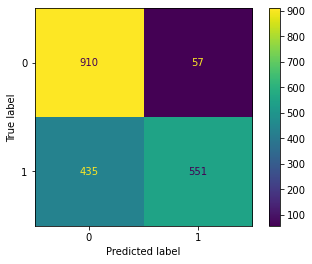

In [230]:
cm_val = confusion_matrix(data_test['Machine failure'], neigh.predict(data_test[label]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

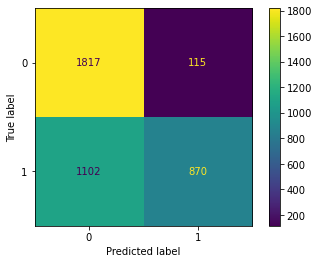

In [231]:
cm_val = confusion_matrix(data_valid['Machine failure'], neigh.predict(data_valid[label]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

## 2. Decision tree model

In [232]:
# Tree model without tuning any hyper parameter
clf = tree.DecisionTreeClassifier(random_state=0, max_features=None)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(data_train[label])

y_test = clf.predict(data_test[label])

y_valid = clf.predict(data_valid[label])

Text(0.5, 1.0, 'Feature Imporatnce ')

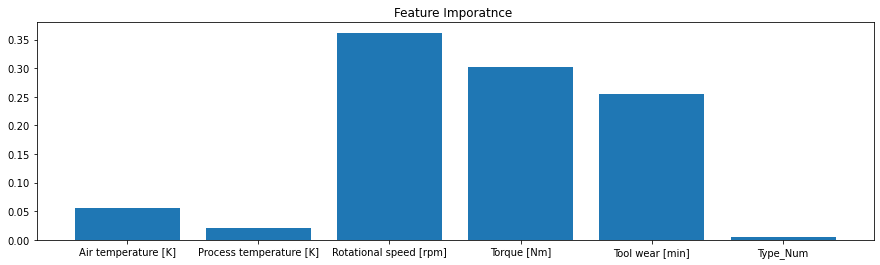

In [233]:
imp = np.vstack((label, clf.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf.feature_importances_)
plt.title('Feature Imporatnce ')

In [234]:
print('Train score :',clf.score(X_train, y_train))
print('Test score : ',clf.score(data_test[label], data_test['Machine failure']))
print('Validation score : ',clf.score(data_valid[label], data_valid['Machine failure']))

Train score : 1.0
Test score :  0.7572964669738863
Validation score :  0.7871413934426229


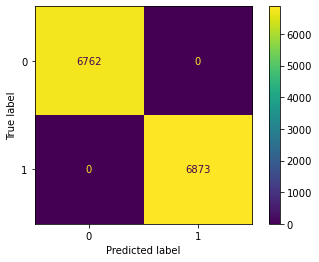

In [235]:
cm_val = confusion_matrix(data_train['Machine failure'], y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [236]:
# Classification report on training data
print(classification_report(data_train['Machine failure'], y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      1.00      1.00      6873

    accuracy                           1.00     13635
   macro avg       1.00      1.00      1.00     13635
weighted avg       1.00      1.00      1.00     13635



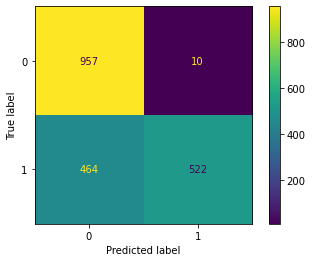

In [237]:
cm_val = confusion_matrix(data_test['Machine failure'], y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [238]:
# Classification report on testing data
print(classification_report(data_test['Machine failure'], y_test))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80       967
           1       0.98      0.53      0.69       986

    accuracy                           0.76      1953
   macro avg       0.83      0.76      0.74      1953
weighted avg       0.83      0.76      0.74      1953



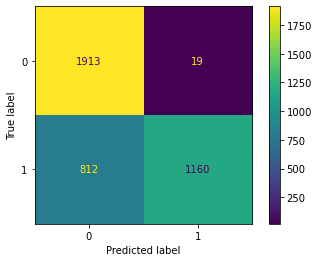

In [239]:
cm_val=confusion_matrix(data_valid['Machine failure'], y_valid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [240]:
# Classification report on validation data
print(classification_report(data_valid['Machine failure'], y_valid))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1932
           1       0.98      0.59      0.74      1972

    accuracy                           0.79      3904
   macro avg       0.84      0.79      0.78      3904
weighted avg       0.84      0.79      0.78      3904



In [241]:
# Depth of overfitted model
print('Depth of overfitted decision tree :',clf.get_depth())

Depth of overfitted decision tree : 19


# 2.1 Post pruning of overfitted model

In [242]:
#Post pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

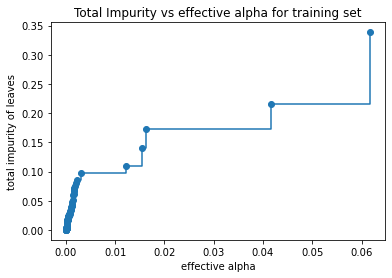

In [243]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [244]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16129184201175412


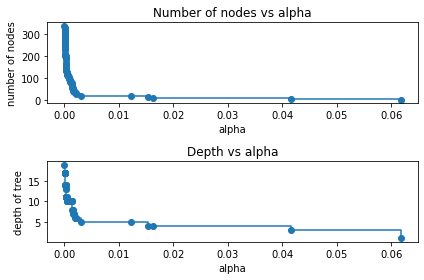

In [245]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

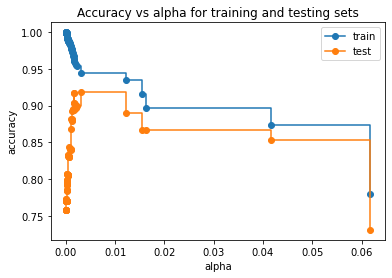

In [246]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(data_test[label], data_test['Machine failure']) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

https://towardsdatascience.com/pre-pruning-or-post-pruning-1dbc8be5cb14

# 2.2 Taking CCP_Alpha =0.01 reduces Max Tree Depth to 5 from 19 , and increses testing accuracy to 91% from 75%

In [247]:
clf_p = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, 
                                  class_weight=None, ccp_alpha=0.01)
clf_p = clf_p.fit(X_train, y_train)

y_test = clf_p.predict(data_test[label])

y_valid = clf_p.predict(data_valid[label])

In [248]:
print('Train score :',clf_p.score(X_train, y_train))
print('Test score : ',clf_p.score(data_test[label], data_test['Machine failure']))
print('Validation score : ',clf_p.score(data_valid[label], data_valid['Machine failure']))

Train score : 0.944041070773744
Test score :  0.9180747567844342
Validation score :  0.923155737704918


In [249]:
print(classification_report(data_test['Machine failure'], y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       967
           1       0.90      0.94      0.92       986

    accuracy                           0.92      1953
   macro avg       0.92      0.92      0.92      1953
weighted avg       0.92      0.92      0.92      1953



In [250]:
print(classification_report(data_test['Machine failure'], y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       967
           1       0.90      0.94      0.92       986

    accuracy                           0.92      1953
   macro avg       0.92      0.92      0.92      1953
weighted avg       0.92      0.92      0.92      1953



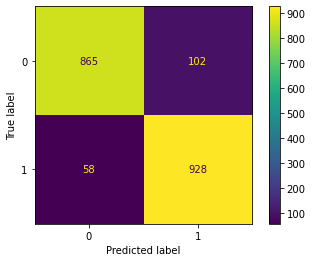

In [251]:
cm_val=confusion_matrix(data_test['Machine failure'], y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

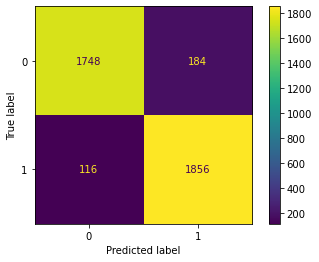

In [252]:
cm_val=confusion_matrix(data_valid['Machine failure'], y_valid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

[Text(193.15384615384616, 199.32, 'X[2] <= 1386.5\ngini = 0.5\nsamples = 13635\nvalue = [6762, 6873]'),
 Text(128.76923076923077, 163.07999999999998, 'X[0] <= 301.55\ngini = 0.267\nsamples = 5651\nvalue = [895, 4756]'),
 Text(103.01538461538462, 126.83999999999999, 'X[3] <= 52.45\ngini = 0.42\nsamples = 2485\nvalue = [745, 1740]'),
 Text(51.50769230769231, 90.6, 'X[4] <= 202.5\ngini = 0.39\nsamples = 547\nvalue = [402, 145]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 374\nvalue = [374, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.271\nsamples = 173\nvalue = [28, 145]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 60.65\ngini = 0.291\nsamples = 1938\nvalue = [343, 1595]'),
 Text(128.76923076923077, 54.359999999999985, 'X[4] <= 188.5\ngini = 0.456\nsamples = 806\nvalue = [284, 522]'),
 Text(103.01538461538462, 18.119999999999976, 'gini = 0.0\nsamples = 268\nvalue = [268, 0]'),
 Text(154.52307692307693, 18.119999999999976, 'gini = 0.058\nsamples = 

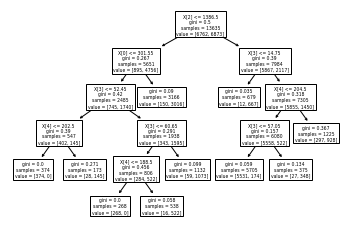

In [253]:
tree.plot_tree(clf_p)

In [254]:
dot_data = tree.export_graphviz(clf_p, out_file=None, feature_names=label, class_names='Machine Failure', filled=True,\
                                rounded=True,  special_characters=True)

In [255]:
graph = graphviz.Source(dot_data) 

In [256]:
graph
graph.render(filename='tree_d3')
pylab.savefig('tree_d3.png')

<Figure size 432x288 with 0 Axes>

In [257]:
clf_p.get_depth()

5

## 3. Random Forest model

In [258]:
X_train = data_train[label]
y_train = data_train['Machine failure']

X_test = data_test[label]
y_test = data_test['Machine failure']

X_valid = data_valid[label]
y_valid = data_valid['Machine failure']

clf_rf = RandomForestClassifier(max_depth=None, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [259]:
print('Train score :',clf_rf.score(X_train, y_train))
print('Test score : ',clf_rf.score(data_test[label], data_test['Machine failure']))
print('Validation score : ',clf_rf.score(data_valid[label], data_valid['Machine failure']))

Train score : 1.0
Test score :  0.789042498719918
Validation score :  0.7535860655737705


### Score of overfitted model

In [260]:
label = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', \
         'Torque [Nm]', 'Tool wear [min]', 'Type_Num']

Text(0.5, 1.0, 'Feature Imporatnce ')

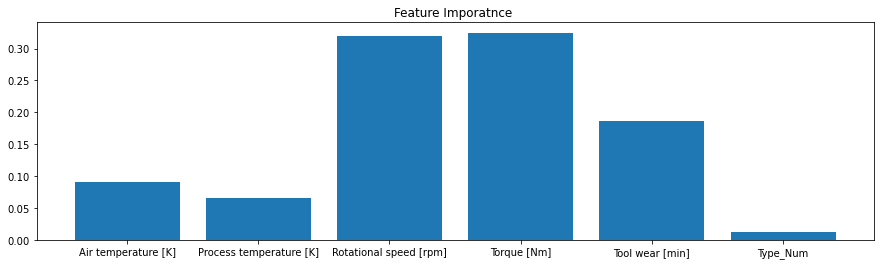

In [261]:
imp = np.vstack((label, clf_rf.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf_rf.feature_importances_)
plt.title('Feature Imporatnce ')

In [262]:
print(classification_report(data_test['Machine failure'], clf_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       967
           1       0.99      0.59      0.74       986

    accuracy                           0.79      1953
   macro avg       0.85      0.79      0.78      1953
weighted avg       0.85      0.79      0.78      1953



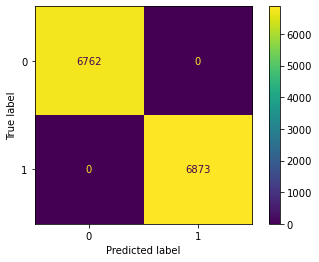

In [263]:
cm_val = confusion_matrix(data_train['Machine failure'], clf_rf.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

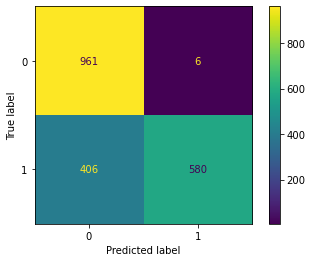

In [264]:
cm_val = confusion_matrix(data_test['Machine failure'], clf_rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

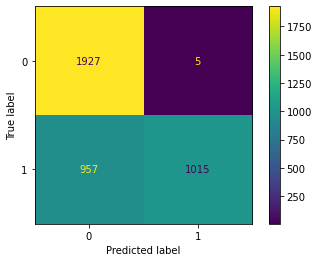

In [265]:
cm_val = confusion_matrix(data_valid['Machine failure'], clf_rf.predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

# 3.1 Taking CCP_Alpha =0.01 increses testing accuracy to 90% from 75%

In [266]:
clf_rf = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, \
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', \
                                max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, \
                                oob_score=False, n_jobs=None, random_state=0, verbose=0,\
                                warm_start=False, class_weight=None, ccp_alpha=0.01, max_samples=None)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.01, random_state=0)

In [267]:
print('Train score :',clf_rf.score(X_train, y_train))
print('Test score : ',clf_rf.score(data_test[label], data_test['Machine failure']))
print('Validation score : ',clf_rf.score(data_valid[label], data_valid['Machine failure']))

Train score : 0.929006233956729
Test score :  0.8986175115207373
Validation score :  0.9111168032786885


In [268]:
print(classification_report(data_test['Machine failure'], clf_rf.predict(X_test),
                            target_names=['Normal operation', "Failure"]))

                  precision    recall  f1-score   support

Normal operation       0.93      0.86      0.89       967
         Failure       0.87      0.94      0.90       986

        accuracy                           0.90      1953
       macro avg       0.90      0.90      0.90      1953
    weighted avg       0.90      0.90      0.90      1953



## 4. Gradient Boosted Tree - XG Boost

In [269]:
# Setting data import
X_train = data_train[label]
y_train = data_train['Machine failure']

X_test = data_test[label]
y_test = data_test['Machine failure']

X_valid = data_valid[label]
y_valid = data_valid['Machine failure']

In [270]:
#Overfit model
clf_xg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,\
                                 max_depth=3, random_state=0).fit(X_train, y_train)
print('Train score :',clf_xg.score(X_train, y_train))
print('Test score : ',clf_xg.score(data_test[label], data_test['Machine failure']))
print('Validation score : ',clf_xg.score(data_valid[label], data_valid['Machine failure']))

Train score : 0.9997799779977998
Test score :  0.8136200716845878
Validation score :  0.7932889344262295


In [271]:
print(classification_report(data_test['Machine failure'], clf_xg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       967
           1       0.98      0.65      0.78       986

    accuracy                           0.81      1953
   macro avg       0.85      0.82      0.81      1953
weighted avg       0.86      0.81      0.81      1953



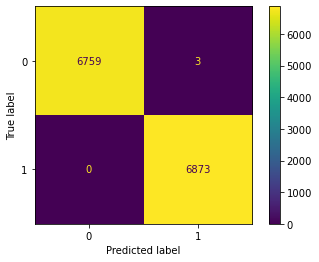

In [272]:
cm_val = confusion_matrix(data_train['Machine failure'], clf_xg.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

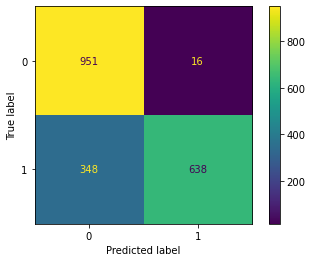

In [273]:
cm_val = confusion_matrix(data_test['Machine failure'], clf_xg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

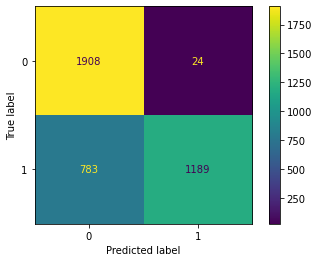

In [274]:
cm_val = confusion_matrix(data_valid['Machine failure'], clf_xg.predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

## 4.1 XG Boost - Tuning

Illustration of the effect of different regularization strategies for Gradient Boosting. The example is taken from Hastie et al 2009 1.

The loss function used is binomial deviance. Regularization via shrinkage (learning_rate < 1.0) improves performance considerably. In combination with shrinkage, stochastic gradient boosting (subsample < 1.0) can produce more accurate models by reducing the variance via bagging. Subsampling without shrinkage usually does poorly. Another strategy to reduce the variance is by subsampling the features analogous to the random splits in Random Forests (via the max_features parameter).

1    T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.


In [275]:
from sklearn import ensemble
from sklearn import datasets

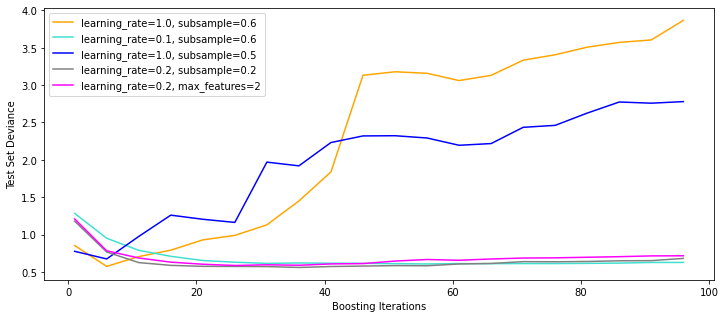

In [276]:
original_params = {
    "n_estimators": 100,
    "max_depth": 3,
    "random_state": 0,
}

plt.figure(figsize =(12, 5))

for label, color, setting in [
    ("learning_rate=1.0, subsample=0.6", "orange", {"learning_rate": 1.0, "subsample": 0.6}),
    ("learning_rate=0.1, subsample=0.6", "turquoise", {"learning_rate": 0.1, "subsample": 0.6}),
    ("learning_rate=1.0, subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.2",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper left")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()

## Taking learning rate = 0.2, subsample = 0.5 and max depth = 3 increses testing accuracy to 91% from 83%

In [277]:
clf_xg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, subsample=0.5,\
                                 max_depth=3, random_state=0).fit(X_train, y_train)
clf_xg.score(X_train, y_train)
print('Train score :',clf_xg.score(X_train, y_train))
print('Test score : ',clf_xg.score(X_test, data_test['Machine failure']))
print('Validation score : ',clf_xg.score(X_valid, data_valid['Machine failure']))

Train score : 0.9870920425375871
Test score :  0.9170506912442397
Validation score :  0.8939549180327869


In [278]:
print(classification_report(data_test['Machine failure'], clf_xg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       967
           1       0.95      0.88      0.91       986

    accuracy                           0.92      1953
   macro avg       0.92      0.92      0.92      1953
weighted avg       0.92      0.92      0.92      1953



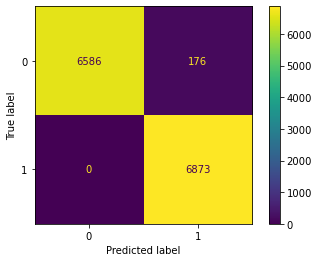

In [279]:
cm_val = confusion_matrix(data_train['Machine failure'], clf_xg.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

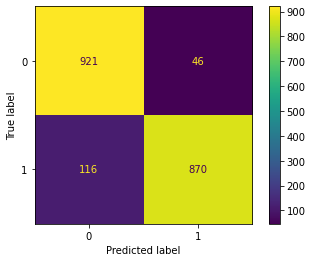

In [280]:
cm_val = confusion_matrix(data_test['Machine failure'], clf_xg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

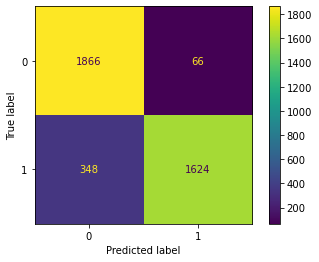

In [281]:
cm_val = confusion_matrix(data_valid['Machine failure'], clf_xg.predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()